# 2022113156 이예령 

# 1. 주제 - 심장병 데이터 분류

# 2. 데이터 수집

데이터 수집 사이트 : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# 3. feature 설명

1. age - 나이
2. sex - 성별 (1 = 남성; 0 = 여성) 
3. cp - 흉통 유형 (값 : 0~3)
4. trestbps - 안정된 휴식 혈압
5. chol - 혈중 콜레스테롤 농도 (mg/dl)
6. fbs - 공복 혈당이 > 120 mg/dl인 경우 (1 = true; 0 = false) 
7. restecg - 휴식 심전도 결과 (값 : 0~2)
8. thalach - 최대 심장 박동 수
9. exang - 협심증 유발 운동 (1 = yes; 0 = no) 
10. oldpeak - 휴식과 비교하여 운동으로 유발되는 ST 저하
11. slope - ST의 최대 기울기 (급성 심근경색 유발 요소)
12. ca - 형광 투시된 주요 혈관의 수 (0~3)
13. thal - 결함 (0 = 정상, 1 = 고정된 결함, 2 = 가역적 결함)
14. target - 심장병 발병 유무 (1 = yes, 0 = no)


# 4. 과정
1. 데이터 탐색
2. 데이터 분할 후 스케일링 진행
3. 로지스틱 회귀 모델링
4. 모든 feature을 기반으로 knn 모델링
5. 특정 feautre을 기반으로 knn 모델링

In [1]:
# 라이브러리 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
# 데이터 불러와서 확인

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# 데이터 갯수 확인

len(df)

1025

In [4]:
# 데이터 통계값 확인

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# 데이터 결측치 확인

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# 심장병 여부 칼럼인 target을 제외한 나머지 feature는 X에, 심장병 여부 칼럼인 target은 y에 할당

X = df.drop(['target'], axis = 1)
y = df['target'].to_numpy()

In [7]:
# 데이터 확인

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [8]:
# 데이터 확인

y

array([0, 0, 0, ..., 0, 1, 0])

In [9]:
# test data와 train data 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 11, stratify = y)

In [10]:
# 평균 0, 표준편차 1로 변환하는 데이터 스케일링 / 로지스틱 회귀는 실행할 때 regularation을 사용하므로 반드시 스케일링을 해야 한다

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('train data의 평균 : {}, 표준편차 {}'.format(np.mean(X_train), np.std(X_train)))
print('test data의 평균 : {}, 표준편차 {}'.format(np.mean(X_test), np.std(X_test)))

train data의 평균 : -1.105339520279096e-17, 표준편차 1.0
test data의 평균 : 0.021023894631453686, 표준편차 1.0160217332341714


In [11]:
# 로지스틱 회귀를 위한 라이브러리 임포트

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# 로지스틱 회귀 모델링

lr = LogisticRegression(C = 0.1, max_iter = 150)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=150)

In [13]:
# feature명 출력

X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [14]:
# 계수 출력 

lr.coef_

array([[-0.05584311, -0.67524977,  0.73482548, -0.17503681, -0.21627648,
        -0.0721289 ,  0.15795199,  0.48876298, -0.47837075, -0.5471542 ,
         0.30188218, -0.61967563, -0.49325045]])

In [15]:
# accuracy 도출 후 출력

lr_y_pred_train = lr.predict(X_train)
lr_y_pred_test = lr.predict(X_test)

print('C = 0.1일 때, Train Accuracy: {:.3f}'.format(accuracy_score(y_train, lr_y_pred_train)))
print('C = 0.1일 때, Test Accuracy: {:.3f}'.format(accuracy_score(y_test, lr_y_pred_test)))

C = 0.1일 때, Train Accuracy: 0.845
C = 0.1일 때, Test Accuracy: 0.847


In [16]:
# test data에서 accuracy가 가장 높은 C 찾기 

iteration = np.arange(0.01, 10.01, 0.01)
c = [0.1]
acc_lr = [0.847]

for i in iteration :
    lr_iter = LogisticRegression(C = i, max_iter = 150)
    lr_iter.fit(X_train, y_train)
    
    lr_y_pred_test = lr_iter.predict(X_test)
    
    if max(acc_lr) < accuracy_score(y_test, lr_y_pred_test):
        c.append(i)
        
    acc_lr.append(accuracy_score(y_test, lr_y_pred_test))

In [17]:
# test data에서 accuracy가 가장 높을 때의 C와 accuracy 출력

print('Test Accuracy가 가장 높을 때의 C = {:.3f}, Test Accuracy : {:.3f}'.format(max(c), max(acc_lr)))

Test Accuracy가 가장 높을 때의 C = 0.150, Test Accuracy : 0.854


In [18]:
# knn을 위한 라이브러리 임포트

from sklearn.neighbors import KNeighborsClassifier

In [19]:
# knn 모델링

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
# accuracy 도출 후 출력

knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

print('n_neighbors = 2일 때, Train Accuracy: {:.3f}' .format(accuracy_score(y_train, knn_y_pred_train)))
print('n_neighbors = 2일 때, Test Accuracy: {:.3f}' .format(accuracy_score(y_test, knn_y_pred_test)))

n_neighbors = 2일 때, Train Accuracy: 0.992
n_neighbors = 2일 때, Test Accuracy: 0.938


In [21]:
# test data에서 accuracy가 가장 높은 n 찾기 

iteration = [i for i in range(1, 20)]
n = [1]
acc_knn_train = [0.992]
acc_knn_test = [0.938]

for i in iteration:
    knn_iter = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn_iter.fit(X_train, y_train)
    
    knn_y_pred_train = knn_iter.predict(X_train)
    knn_y_pred_test = knn_iter.predict(X_test)
    
    if max(acc_knn_test) < accuracy_score(y_test, knn_y_pred_test):
        n.append(i)
        
    acc_knn_train.append(accuracy_score(y_train, knn_y_pred_train))
    acc_knn_test.append(accuracy_score(y_test, knn_y_pred_test))

In [22]:
# test data에서 accuracy가 가장 높을 때의 n과 accuracy 출력

print('Test Accuracy가 가장 높을 때의 n = {}, Test Accuracy : {:.3f}'.format(max(n), max(acc_knn_test)))

Test Accuracy가 가장 높을 때의 n = 1, Test Accuracy : 0.981


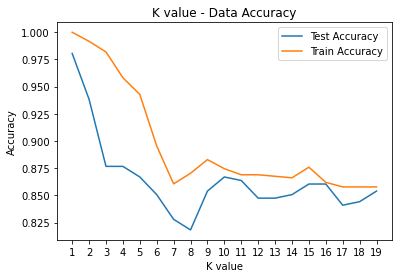

In [23]:
# knn data accuracy 시각화

plt.plot(range(1, 20), acc_knn_test[1:], label = 'Test Accuracy')
plt.plot(range(1, 20), acc_knn_train[1:], label = 'Train Accuracy')
plt.legend()

plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel("Accuracy")
plt.title('K value - Data Accuracy')
plt.show()

In [24]:
# 데이터의 상관계수 계산

co = df.corr()
co.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [25]:
# 데이터의 상관계수를 통해 3개의 feature 선택

three_X = df.loc[:, ['cp', 'thal', 'thalach']]

In [26]:
# test data와 train data 분할

from sklearn.model_selection import train_test_split

three_X_train, three_X_test, y_train, y_test = train_test_split(
    three_X, y, test_size = 0.3, random_state = 11, stratify = y)

In [27]:
# 평균 0, 표준편차 1로 변환하는 데이터 스케일링

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(three_X_train)
X_test = sc.transform(three_X_test)

print('train data의 평균 : {}, 표준편차 {}'.format(np.mean(X_train), np.std(X_train)))
print('test data의 평균 : {}, 표준편차 {}'.format(np.mean(X_test), np.std(X_test)))

train data의 평균 : -6.111129991428105e-17, 표준편차 1.0
test data의 평균 : 0.027630136663110313, 표준편차 1.0095034925129942


In [28]:
# knn 모델링

knn = KNeighborsClassifier(n_neighbors = 2, p = 2, metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [29]:
# accuracy 도출 후 출력

knn_y_pred_train = knn.predict(X_train)
knn_y_pred_test = knn.predict(X_test)

print('n_neighbors = 2일 때, Train Accuracy: {:.3f}' .format(accuracy_score(y_train, knn_y_pred_train)))
print('n_neighbors = 2일 때, Test Accuracy: {:.3f}' .format(accuracy_score(y_test, knn_y_pred_test)))

n_neighbors = 2일 때, Train Accuracy: 0.926
n_neighbors = 2일 때, Test Accuracy: 0.828


In [30]:
# test data에서 accuracy가 가장 높은 n 찾기 

iteration = [i for i in range(1, 20)]
n = [1]
acc_knn_train = [0.926]
acc_knn_test = [0.828]


for i in iteration:
    knn_iter = KNeighborsClassifier(n_neighbors = i, p = 2, metric = 'minkowski')  # n_neighbors means k
    knn_iter.fit(X_train, y_train)
    
    knn_y_pred_train = knn_iter.predict(X_train)
    knn_y_pred_test = knn_iter.predict(X_test)
    
    if max(acc_knn_test) < accuracy_score(y_test, knn_y_pred_test):
        n.append(i)
    
    acc_knn_train.append(accuracy_score(y_train, knn_y_pred_train))
    acc_knn_test.append(accuracy_score(y_test, knn_y_pred_test))

In [31]:
# test data에서 accuracy가 가장 높을 때의 n과 accuracy 출력

print('Test Accuracy가 가장 높을 때의 n = {}, Test Accuracy : {:.3f}'.format(max(n), max(acc_knn_test)))

Test Accuracy가 가장 높을 때의 n = 1, Test Accuracy : 0.873


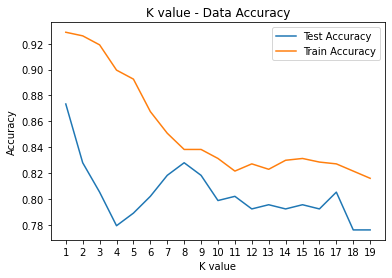

In [32]:
# knn data accuracy 시각화

plt.plot(range(1, 20), acc_knn_test[1:], label = 'Test Accuracy')
plt.plot(range(1, 20), acc_knn_train[1:], label = 'Train Accuracy')
plt.legend()

plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel("Accuracy")
plt.title('K value - Data Accuracy')
plt.show()